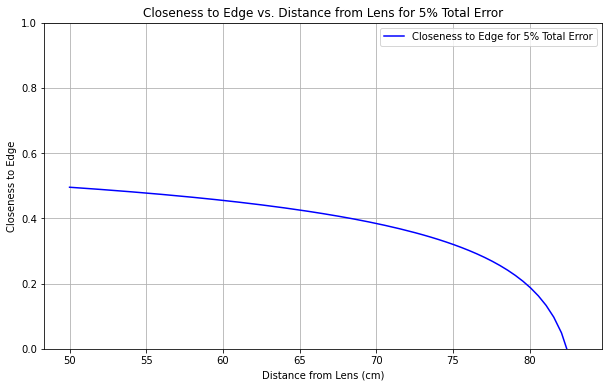

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def closeness_to_edge_for_5_percent_error(distance_from_lens):
    """
    Calculate closeness to edge required to achieve a total percent error of 5%,
    given the distance from the lens.

    :param distance_from_lens: Distance from the lens in cm
    :return: Closeness to edge (between 0 and 1)
    """
    percent_error_1 = 0.356454 * np.exp(0.020674 * distance_from_lens)
    required_error_from_edge = 2 - percent_error_1
    if required_error_from_edge <= 0:
        return np.nan  # No solution if error from distance is already 5% or more
    closeness_to_edge = np.log(required_error_from_edge / 0.039843) / 6.50183
    return closeness_to_edge

# Generate values for distance from lens within the specified range
distance_values = np.linspace(50, 250, 400)

# Calculate the corresponding closeness to edge values
closeness_values = [closeness_to_edge_for_5_percent_error(d) for d in distance_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distance_values, closeness_values, color='blue', label='Closeness to Edge for 5% Total Error')
plt.xlabel('Distance from Lens (cm)')
plt.ylabel('Closeness to Edge')
plt.title('Closeness to Edge vs. Distance from Lens for 5% Total Error')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


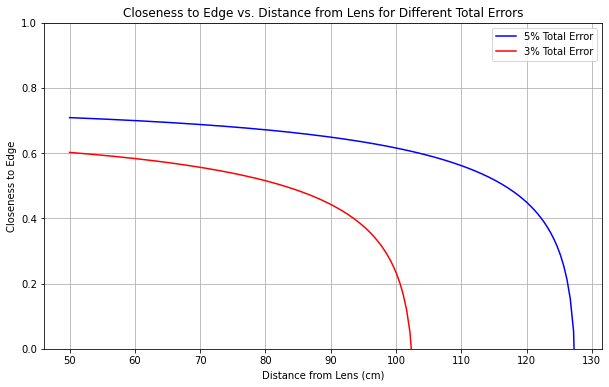

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def closeness_to_edge_for_specific_error(distance_from_lens, total_percent_error):
    """
    Calculate closeness to edge required to achieve a specified total percent error,
    given the distance from the lens.

    :param distance_from_lens: Distance from the lens in cm
    :param total_percent_error: Desired total percent error
    :return: Closeness to edge (between 0 and 1)
    """
    percent_error_1 = 0.356454 * np.exp(0.020674 * distance_from_lens)
    required_error_from_edge = total_percent_error - percent_error_1
    if required_error_from_edge <= 0:
        return np.nan  # No solution if error from distance is already equal to or exceeds the total percent error
    closeness_to_edge = np.log(required_error_from_edge / 0.039843) / 6.50183
    return closeness_to_edge

# Generate values for distance from lens within the specified range
distance_values = np.linspace(50, 250, 400)

# Calculate closeness values for 5% and 2% total error
closeness_values_5_percent = [closeness_to_edge_for_specific_error(d, 5) for d in distance_values]
closeness_values_2_percent = [closeness_to_edge_for_specific_error(d, 3) for d in distance_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distance_values, closeness_values_5_percent, color='blue', label='5% Total Error')
plt.plot(distance_values, closeness_values_2_percent, color='red', label='3% Total Error')
plt.xlabel('Distance from Lens (cm)')
plt.ylabel('Closeness to Edge')
plt.title('Closeness to Edge vs. Distance from Lens for Different Total Errors')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


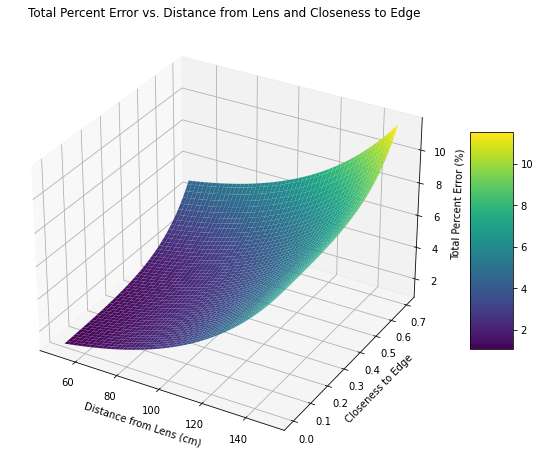

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to calculate total percent error
def total_percent_error(distance_from_lens, closeness_to_edge):
    error1 = 0.356454 * np.exp(0.020674 * distance_from_lens)
    error2 = 0.039843 * np.exp(6.510183 * closeness_to_edge)
    total_error = error1 + error2
    return np.clip(total_error, 0, 100)

# Define the range for distance_from_lens and closeness_to_edge
distance_from_lens = np.linspace(0, 300, 100)  # From 0 to 300 cm
closeness_to_edge = np.linspace(0, 1, 100)     # From 0 to 1

# Create a meshgrid for 3D plotting
D, C = np.meshgrid(distance_from_lens, closeness_to_edge)

# Calculate total percent error
total_error = total_percent_error(D, C)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(D, C, total_error, cmap='viridis')

# Labels and titles
ax.set_xlabel('Distance from Lens (cm)')
ax.set_ylabel('Closeness to Edge')
ax.set_zlabel('Total Percent Error (%)')
ax.set_title('Total Percent Error vs. Distance from Lens and Closeness to Edge')

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()
